In [0]:
import cv2
import numpy as np
import pandas as pd
import re
import math
from skimage import feature
from skimage.feature import hog
from imutils import paths
from google.colab.patches import cv2_imshow
import os

from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Model
from keras.layers import Input

# Load Inception_v3 pretrained on ImageNet dataset
model = InceptionV3(include_top=False, weights='imagenet', pooling='avg', input_tensor=Input(shape=(299,299,3)))


# List of paths 
file_list=[]
file_list.append(os.listdir(r"/content/drive/My Drive/Base/humanos"))
file_list.append(os.listdir(r"/content/drive/My Drive/Base/praia"))
file_list.append(os.listdir(r"/content/drive/My Drive/Base/obras"))
file_list.append(os.listdir(r"/content/drive/My Drive/Base/onibus"))
file_list.append(os.listdir(r"/content/drive/My Drive/Base/dino"))
file_list.append(os.listdir(r"/content/drive/My Drive/Base/elefante"))
file_list.append(os.listdir(r"/content/drive/My Drive/Base/flores"))
file_list.append(os.listdir(r"/content/drive/My Drive/Base/cavalos"))
file_list.append(os.listdir(r"/content/drive/My Drive/Base/montanhas"))
file_list.append(os.listdir(r"/content/drive/My Drive/Base/comida"))

# general path
path='/content/drive/My Drive/Base/'

# list of classes
class_names=['humanos', 'praia', 'obras', 'onibus', 'dino', 'elefante', 'flores', 'cavalos', 'montanhas', 'comida'] 

X = []
X_deep = []
y = []

# Feature extraction
for classes_files, classe in zip (file_list, range(10)):
    for i in range(100):
      name= str(path) + str(class_names[classe]) + str('/') + str(classes_files[i]) 
      imagem = cv2.imread(name)
      print(imagem.shape)
      altura, largura, _ = imagem.shape
    
# Convert the image to RGB and Gray    
      cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
      rgb   = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# Color Histograms
      r_histograma = cv2.calcHist([rgb], [0], None, [256], [0, 256])/(altura*largura)
      g_histograma = cv2.calcHist([rgb], [1], None, [256], [0, 256])/(altura*largura)
      b_histograma = cv2.calcHist([rgb], [2], None, [256], [0, 256])/(altura*largura)

# Local Binary Pattern (LBP)
      lbp = feature.local_binary_pattern(cinza, 59, 1, method="uniform")
      (lbp_histograma, _) = np.histogram(lbp.ravel(), bins=59, range=(0, 59))
      lbp_histograma = lbp_histograma.astype("float")
      lbp_histograma /= (lbp_histograma.sum())
    
# Hog (Hostogram of Gradient - Direction)
      hg = hog(cinza, orientations=8, pixels_per_cell=(32, 32), cells_per_block=(8, 8), block_norm='L2-Hys')
    
# Concatenate the handcrafted feature sets
      X_image = [lbp_histograma, hg, r_histograma, g_histograma, b_histograma]    
      X_image_aux = []
      for aux in X_image:
          X_image_aux = np.append(X_image_aux, np.ravel(aux))
    
      X_image = [i for i in X_image_aux]
      y.append(classe)
      X.append(X_image)
      
# Extract deep features using InceptionV3 pretrained model 
      img = cv2.resize(imagem,(299,299))
      xd = image.img_to_array(img)
      xd = np.expand_dims(xd, axis=0)
      xd = preprocess_input(xd)
      deep_features = model.predict(xd)
      print(deep_features.shape)
      
      X_image_aux = []
      for aux in deep_features:
          X_image_aux = np.append(X_image_aux, np.ravel(aux))
    
      deep_features = [i for i in X_image_aux]
      
      X_deep.append(deep_features)

            
# Saving the extracted features (handcrafted) in a csv file
df = pd.DataFrame(X)
df.to_csv('X.csv', header=False, index=False)

# Saving the extracted features (deep) in a csv file
df = pd.DataFrame(X_deep)
df.to_csv('X_deep.csv', header=False, index=False)

# Saving the classes in a csv file
df_class = pd.DataFrame(y)
df_class.to_csv('y.csv', header=False, index=False)

Using TensorFlow backend.










87916544/87910968 [==============================] - 2s 0us/step
(384, 256, 3)
(1, 2048)
(256, 384, 3)
(1, 2048)
(256, 384, 3)
(1, 2048)
(256, 384, 3)
(1, 2048)
(256, 384, 3)
(1, 2048)
(256, 384, 3)
(1, 2048)
(384, 256, 3)
(1, 2048)
(384, 256, 3)
(1, 2048)
(256, 384, 3)
(1, 2048)
(384, 256, 3)
(1, 2048)
(256, 384, 3)
(1, 2048)
(384, 256, 3)
(1, 2048)
(384, 256, 3)
(1, 2048)
(256, 384, 3)
(1, 2048)
(384, 256, 3)
(1, 2048)
(256, 384, 3)
(1, 2048)
(256, 384, 3)
(1, 2048)
(256, 384, 3)
(1, 2048)
(256, 384, 3)
(1, 2048)
(384, 256, 3)
(1, 2048)
(256, 384, 3)
(1, 2048)
(384, 256, 3)
(1, 2048)
(256, 384, 3)
(1, 2048)
(256, 384, 3)
(1, 2048)
(256, 384, 3)
(1, 2048)
(384, 256, 3)
(1, 2048)
(256, 384, 3)
(1, 2048)
(384, 256, 3)
(1, 2048)
(384, 256, 3)
(1, 2048)
(256, 384, 3)
(1, 2048)
(256, 384, 3)
(1, 2048)
(256, 384, 3)
(1, 2048)
(384, 256, 3)
(1, 2048)
(256, 384, 3)
(1, 2048)
(384, 256, 3)
(1, 2048)
(256, 384, 3)
(1, 2048)
(256, 384, 3)
(1, 2048)
(256, 384, 3)
(1, 2048)
(256, 384, 3)
(

In [0]:
# mount google drive to access the image dataset

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Example: how to load the csv files (features and labels)

import pandas as pd
import numpy as np

# Labels
y = pd.read_csv('y.csv', header=None)
y=y.to_numpy()
y=np.ravel(y)
print(y.shape)

# handcrafted features
#X = pd.read_csv('X.csv', header=None)
#X=X.to_numpy()
#print(X.shape)

# deep features
X = pd.read_csv('X_deep.csv', header=None)
X=X.to_numpy()
print(X.shape)

(1000,)
(1000, 2048)


In [0]:
# Este exemplo carrega a base Wine da UCI, treina um classificador Naive Bayes
# usando holdout e outro usando validaÃ§Ã£o cruzada com 10 pastas. 

# Importa bibliotecas necessÃ¡rias 
import numpy as np
import urllib
from sklearn.naive_bayes import GaussianNB
from sklearn import  model_selection
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# EXEMPLO USANDO HOLDOUT
# Holdout -> dividindo a base em treinamento (70%) e teste (30%), estratificada
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=42, stratify=y)

# Treina o classificador
#clfa = GaussianNB()
clfa = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
clfa = clfa.fit(X_train, y_train)

# testa usando a base de testes
predicted=clfa.predict(X_test)

# calcula a acurÃ¡cia na base de teste
score=clfa.score(X_test, y_test)

# calcula a matriz de confusÃ£o
matrix = confusion_matrix(y_test, predicted)

# apresenta os resultados
print("Accuracy = %.2f " % score)
print("Confusion Matrix:")
print(matrix)

# EXEMPLO USANDO VALIDAÃ‡ÃƒO CRUZADA

clfb = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
#clfb = GaussianNB()
folds=10
result = model_selection.cross_val_score(clfb, X, y, cv=folds)
print("\nCross Validation Results %d folds:" % folds)
print("Mean Accuracy: %.2f" % result.mean())
print("Mean Std: %.2f" % result.std())

# matriz de confusÃ£o da validaÃ§Ã£o cruzada
Z = model_selection.cross_val_predict(clfb, X, y, cv=folds)
cm=confusion_matrix(y, Z)
print("Confusion Matrix:")
print(cm)

Accuracy = 0.97 
Confusion Matrix:
[[30  0  0  0  0  0  0  0  0  0]
 [ 3 26  1  0  0  0  0  0  0  0]
 [ 2  0 27  0  0  0  0  0  0  1]
 [ 0  0  0 30  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 1  0  0  0  0  0 29  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0]
 [ 0  0  1  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0  0  0 30]]

Cross Validation Results 10 folds:
Mean Accuracy: 0.98
Mean Std: 0.01
Confusion Matrix:
[[ 94   2   2   0   0   0   0   0   0   2]
 [  4  95   1   0   0   0   0   0   0   0]
 [  3   0  96   0   0   0   0   0   0   1]
 [  0   0   0 100   0   0   0   0   0   0]
 [  0   0   0   0 100   0   0   0   0   0]
 [  0   0   0   0   0 100   0   0   0   0]
 [  0   0   0   0   0   0  99   0   0   1]
 [  0   0   0   0   0   0   0 100   0   0]
 [  0   1   0   0   0   0   0   0  99   0]
 [  0   0   0   0   0   0   0   0   0 100]]


(300,)
Label: 1 praia   /  Prediction:  0 humanos
/content/drive/My Drive/Base/praia/107.jpg


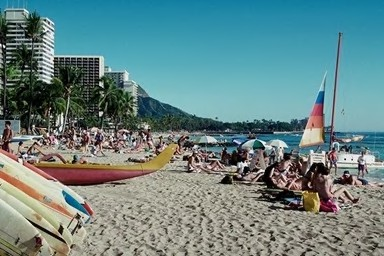

Label: 2 obras   /  Prediction:  0 humanos
/content/drive/My Drive/Base/obras/290.jpg


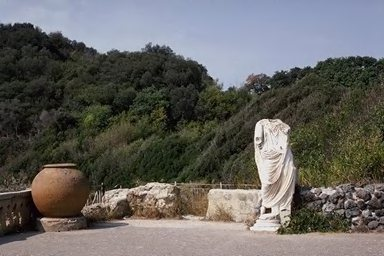

Label: 2 obras   /  Prediction:  9 comida
/content/drive/My Drive/Base/obras/253.jpg


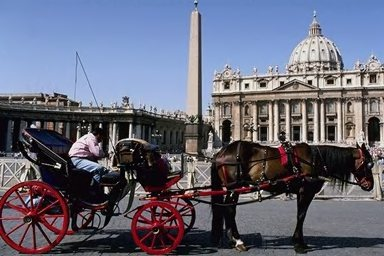

Label: 8 montanhas   /  Prediction:  2 obras
/content/drive/My Drive/Base/montanhas/856.jpg


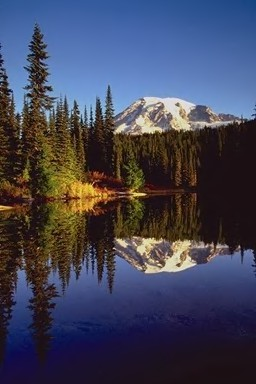

Label: 1 praia   /  Prediction:  0 humanos
/content/drive/My Drive/Base/praia/101.jpg


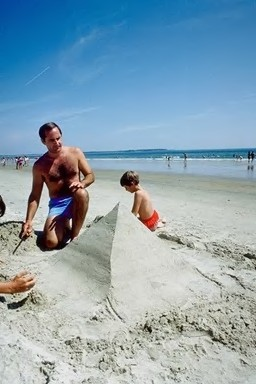

Label: 2 obras   /  Prediction:  0 humanos
/content/drive/My Drive/Base/obras/297.jpg


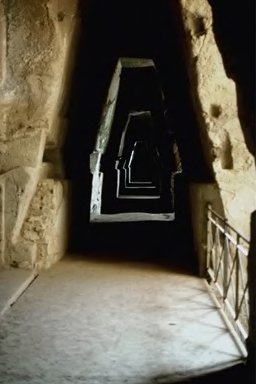

Label: 1 praia   /  Prediction:  0 humanos
/content/drive/My Drive/Base/praia/108.jpg


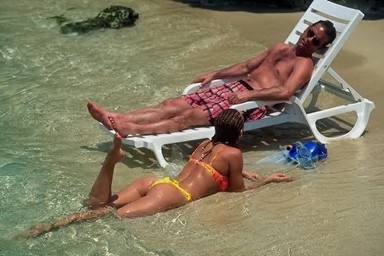

Label: 1 praia   /  Prediction:  2 obras
/content/drive/My Drive/Base/praia/123.jpg


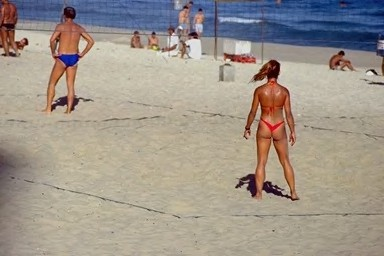

Label: 6 flores   /  Prediction:  0 humanos
/content/drive/My Drive/Base/flores/689.jpg


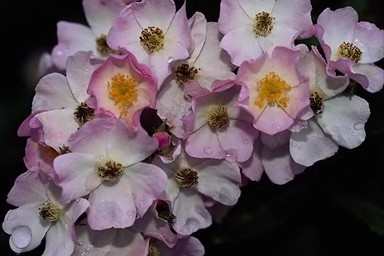

In [0]:
# Plot mistakes (images)
print(predicted.shape)
for i in range(len(predicted)):
    if (predicted[i] != y_test[i]):
        dist=1
        j=0
        while (j<len(X) and dist !=0): 
            dist = np.linalg.norm(X[j]-X_test[i])
            j+=1
        print("Label:", y[j-1], class_names[y[j-1]], "  /  Prediction: ", predicted[i], class_names[predicted[i]] )
        name= "/content/drive/My Drive/Base/" + str(class_names[y[j-1]]) + "/" + str(j)+ ".jpg" 
        print(name)
        im=cv2.imread(name)
        cv2_imshow(im)
        print("=============================================================================")
  
